<a href="https://colab.research.google.com/github/racs2019/Data-Science-Basics-Series/blob/main/Single_Layer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Single Layer Perceptron

This mini project focuses on creating perceptron models for the task of handwritten digit classification. The first part of the assignment uses a single layer perceptron to perform binary classification and determine if an image is a specific digit or not. The second part of the assignment uses a multi-layer perceptron to perform multiclass digit classification (0-9).

##Part 1 - Single Layer Perceptron


The first part of this assignment utilizes a dataset of 5,000 handwritten digits for training to create a single layer perceptron. The model is then tested on the 1,000 test data samples, and the weight trajectory graph and final test accuracy is shown. The single layer perceptron is initially trained as a binary 0 or not 0 classifier, and the architecture is then used to create a binary 8 or not, 1 or not, and 2 or not digit classifier for comparison.

---




**Dependencies**

This section contains all dependencies used for the rest of the code cells.


In [ ]:
!pip install pymatreader

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from pymatreader import read_mat

**Data Preparation**

The code cell below downloads the matlab datafile from github.

In [ ]:
!wget https://github.com/racs2019/A2ML/raw/main/digitsfile.mat

--2024-02-07 16:12:01--  https://github.com/racs2019/A2ML/raw/main/digitsfile.mat
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/racs2019/A2ML/main/digitsfile.mat [following]
--2024-02-07 16:12:01--  https://raw.githubusercontent.com/racs2019/A2ML/main/digitsfile.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1015027 (991K) [application/octet-stream]
Saving to: ‘digitsfile.mat’

digitsfile.mat      100%[===================>] 991.24K  --.-KB/s    in 0.05s   

2024-02-07 16:12:02 (20.2 MB/s) - ‘digitsfile.mat’ saved [1015027/1015027]



The code cells below convert the matlab datafile into correctly formatted numpy arrays for train, test, train labels, and test labels data.

In [ ]:
#Read data from matlab workspace file
data = read_mat('digitsfile.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'test', 'testlabels', 'train', 'trainlabels'])

In [ ]:
#Convert matlab data into separate train/test and label arrays
train = data['train']
test = data['test']
trainlabels =  data['trainlabels']
testlabels =  data['testlabels']

In [ ]:
#Reshape the arrays to form vectors of the correct sizes
#Train data
tr = np.ones((784,5000))
for i in range(5000):
  tr[:,i] = train[:,i]

trlabels = np.ones((5000,1))
trlabels[:,0] = trainlabels
trlabels = np.array(trlabels)

#Test data
tst = np.ones((784,1000))
for i in range(1000):
  tst[:,i] = test[:,i]

tstlabels = np.ones((1000,1))
tstlabels[:,0] = testlabels
tstlabels = np.array(tstlabels)

**Displaying a Digit**

The code cell below converts the flattened data array into a 28*28 array to display the digits as an image. Four data samples and their corresponding labels are shown.

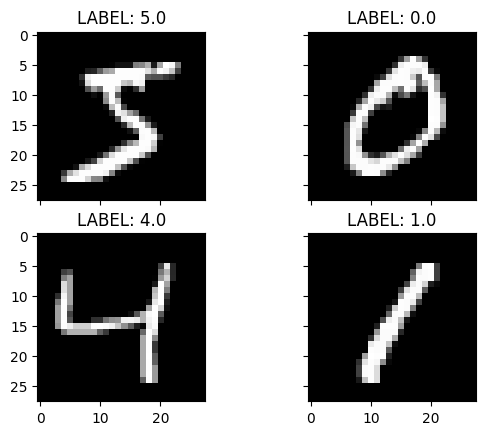

In [ ]:
#Reshape the data
x = np.zeros((28, 28, 5000))
for k in range(5000):
    dummy = tr[:, k]
    for i in range(28):
        for j in range(28):
            x[i, j, k] = dummy[i * 28 + j]

#Display images
fig, axs = plt.subplots(2, 2)
for ax in axs.flat:
    ax.label_outer()

axs[0,0].set_title('LABEL: ' + str(trlabels[0][0]))
axs[0,0].imshow(x[:, :, 0].T, cmap='gray')
axs[0,1].set_title('LABEL: ' + str(trlabels[1][0]))
axs[0,1].imshow(x[:, :, 1].T, cmap='gray')
axs[1,0].set_title('LABEL: ' + str(trlabels[2][0]))
axs[1,0].imshow(x[:, :, 2].T, cmap='gray')
axs[1,1].set_title('LABEL: ' + str(trlabels[3][0]))
axs[1,1].imshow(x[:, :, 3].T, cmap='gray')

**Functions**

The code cells below contain the functions used to create and train the weights for the single layer perceptron.

In [ ]:
def init_weights(layer_size=784):
  #Randomly initialize weights
  tempweights = np.random.uniform(-1, 1, layer_size)
  weights = np.zeros((layer_size,1))
  weights[:,0] = tempweights

  #Create an array to hold weight history for plotting
  weights_array = []
  for i in range(layer_size):
    weights_array.append([])
  return weights, weights_array

In [ ]:
#Main SLP training algorithm
def SLP(trianing_iterations, alpha, tr, trlabels, weights, number):
  for j in range(trianing_iterations):
    number_correct = 0
    number_incorrect = 0
    #Loop through each sample and update weights one by one
    for i in range(len(tr[0])):
      temp = np.zeros((784,1))
      temp[:,0] = tr[:,i]
      inner_product = np.dot(np.transpose(temp), weights)
      #Correct case, no change
      if inner_product[0] >= 0 and trlabels[i] == number:
        weights = weights
        number_correct = number_correct + 1
      #Correct case, no change
      elif inner_product[0] <0 and trlabels[i] != number:
        weights = weights
        number_correct = number_correct + 1
      #Incorrect case, update weights
      elif inner_product[0] >=0 and trlabels[i] != number:
        tarray = np.zeros((784,1))
        tarray[:,0] = tr[:,i]
        weights = weights - alpha * tarray
        number_incorrect = number_incorrect + 1
      #Incorrect case, update weights
      elif inner_product[0] <0 and trlabels[i] == number:
        tarray = np.zeros((784,1))
        tarray[:,0] = tr[:,i]
        weights = weights + alpha * tarray
        number_incorrect = number_incorrect + 1
    #Display overall accuracy at the end of the iteration
    print('Accuracy at iteration: ', j, ': ', number_correct/5000)
    #Save weight history for graphing
    for k in range(784):
      weights_array[k].append(weights[k][0])
  return weights, weights_array

In [ ]:
#Function to test the model using the test data and print the accuracy
def test_accuracy(tst, weights, number):
  #Get output/prediction
  inner_product = np.dot(np.transpose(tst), weights)
  number_correct = 0
  number_incorrect = 0
  predictions = []
  #Loop through all test data
  for i in range(1000):
    #Calculate and display overall accuracy
    if inner_product[i][0] >= 0 and tstlabels[i] == number:
      number_correct = number_correct + 1
    elif inner_product[i][0] <0 and tstlabels[i] != number:
      number_correct = number_correct + 1
    else:
      number_incorrect = number_incorrect + 1
    predictions.append(inner_product[i][0])
  print('Accuracy:', number_correct/1000)
  return(predictions)

In [ ]:
#Function to plot changes in weights
def plot_weights(weights_array):
  for i in range(784):
    if i%10 == 0:
      plt.plot(weights_array[i])
  plt.xlabel("Training Iteration")
  plt.ylabel("Weight Value")
  plt.title("Weights During Training")
  plt.show()

###Binary Classifer for Handwritten 0

The code cells below train the SLP architecture to classify digits as 0 or not. The model is run for 100 iterations (each iteration is a full cycle of all 5,000 data points), with the accuracy at each iteration being displayed. The weight trajectory graph is also shown, followed by the overall accuracy on the test data and a visual of a few classified samples.

In [ ]:
trianing_iterations = 100
alpha = 0.1
weights, weights_array = init_weights()
#Call main SLP algorithm
weights, weights_array = SLP(trianing_iterations, alpha, tr, trlabels, weights, 0)

Accuracy at iteration:  0 :  0.9728
Accuracy at iteration:  1 :  0.9836
Accuracy at iteration:  2 :  0.9884
Accuracy at iteration:  3 :  0.9904
Accuracy at iteration:  4 :  0.9884
Accuracy at iteration:  5 :  0.9906
Accuracy at iteration:  6 :  0.99
Accuracy at iteration:  7 :  0.9914
Accuracy at iteration:  8 :  0.9922
Accuracy at iteration:  9 :  0.9936
Accuracy at iteration:  10 :  0.9922
Accuracy at iteration:  11 :  0.9942
Accuracy at iteration:  12 :  0.9918
Accuracy at iteration:  13 :  0.993
Accuracy at iteration:  14 :  0.9942
Accuracy at iteration:  15 :  0.9946
Accuracy at iteration:  16 :  0.9926
Accuracy at iteration:  17 :  0.994
Accuracy at iteration:  18 :  0.9958
Accuracy at iteration:  19 :  0.993
Accuracy at iteration:  20 :  0.9944
Accuracy at iteration:  21 :  0.9954
Accuracy at iteration:  22 :  0.995
Accuracy at iteration:  23 :  0.9948
Accuracy at iteration:  24 :  0.9954
Accuracy at iteration:  25 :  0.9964
Accuracy at iteration:  26 :  0.9958
Accuracy at itera

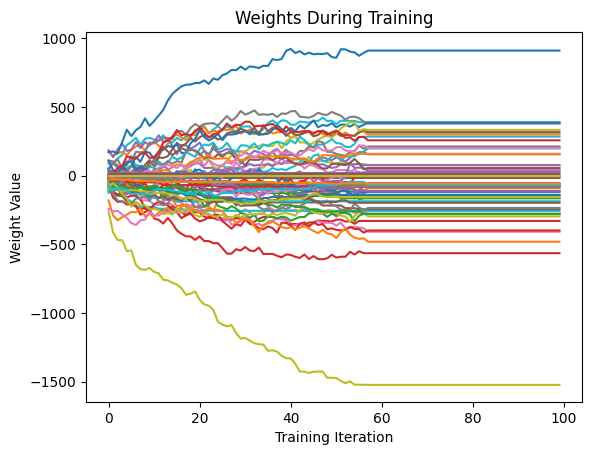

In [ ]:
plot_weights(weights_array)

In [ ]:
print('ACCURCY ON TEST DATA')
print('--------------------')
predictions = test_accuracy(tst, weights, 0)

ACCURCY ON TEST DATA
--------------------
Accuracy: 0.983


The code cell below visually displays four samples along with the label and prediction that the single layer perceptron made. A positive prediction means that the model predicted the sample as a and written 0 digit, while a negative means that the sample was a digit other than 0.

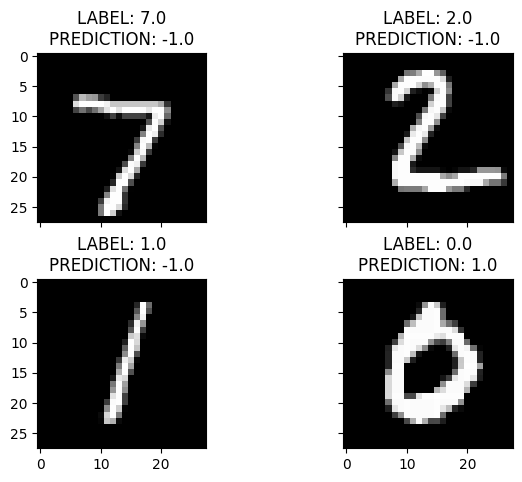

In [ ]:
#Reshape the data
x = np.zeros((28, 28, 1000))
for k in range(1000):
    dummy = tst[:, k]
    for i in range(28):
        for j in range(28):
            x[i, j, k] = dummy[i * 28 + j]

#Create subplots
fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=2)
for ax in axs.flat:
    ax.label_outer()

#Display subplots
axs[0,0].set_title('LABEL: ' + str(tstlabels[0][0]) + '\nPREDICTION: ' + str(math.copysign(1, predictions[0])))
axs[0,0].imshow(x[:, :, 0].T, cmap='gray')
axs[0,1].set_title('LABEL: ' + str(tstlabels[1][0]) + '\nPREDICTION: ' + str(math.copysign(1, predictions[1])))
axs[0,1].imshow(x[:, :, 1].T, cmap='gray')
axs[1,0].set_title('LABEL: ' + str(tstlabels[2][0]) + '\nPREDICTION: ' + str(math.copysign(1, predictions[2])))
axs[1,0].imshow(x[:, :, 2].T, cmap='gray')
axs[1,1].set_title('LABEL: ' + str(tstlabels[3][0]) + '\nPREDICTION: ' + str(math.copysign(1, predictions[3])))
axs[1,1].imshow(x[:, :, 3].T, cmap='gray')

**How is the performance of the system? Also look at the image of your weights, how does it look? Why?**

Overall, as shown by the test accuracy of 98.3 in the code cells above, the SLP performed well when classifying digits as either 0 or not. This makes sense as the digit 0 is significantly different from every other digit in structure, which would make finding the best weight combinations to separate digits as 0 or other a relatively simple and successful process. When looking at the weight history graph, you can see that the weights slowly fluctuate in a specific direction until all training samples are correctly classified following a certain number of iterations. After that iteration, the weights are constant which makes sense since the update rule does not change any of the weights if the samples are all classified correctly. Finally, since the weights are updated after each sample (not in a batch), the weights fluctuate slightly and are not smooth as they tend towards their final values.




###Binary Classifer for Handwritten 8

The code cells below train the SLP architecture to classify digits as 8 or not. The model is run for 1000 iterations (each iteration is a full cycle of all 5,000 data points), with the accuracy at each iteration being displayed. The weight trajectory graph is also shown, followed by the overall accuracy on the test data and a visual of a few classified samples.



In [ ]:
trianing_iterations = 1000
alpha = 0.1
weights, weights_array = init_weights()
#Call main SLP algorithm
weights, weights_array = SLP(trianing_iterations, alpha, tr, trlabels, weights, 8)

Accuracy at iteration:  0 :  0.9108
Accuracy at iteration:  1 :  0.9272
Accuracy at iteration:  2 :  0.9298
Accuracy at iteration:  3 :  0.935
Accuracy at iteration:  4 :  0.9314
Accuracy at iteration:  5 :  0.9372
Accuracy at iteration:  6 :  0.9366
Accuracy at iteration:  7 :  0.9394
Accuracy at iteration:  8 :  0.9356
Accuracy at iteration:  9 :  0.934
Accuracy at iteration:  10 :  0.9398
Accuracy at iteration:  11 :  0.9426
Accuracy at iteration:  12 :  0.9428
Accuracy at iteration:  13 :  0.9422
Accuracy at iteration:  14 :  0.942
Accuracy at iteration:  15 :  0.9382
Accuracy at iteration:  16 :  0.942
Accuracy at iteration:  17 :  0.9406
Accuracy at iteration:  18 :  0.9418
Accuracy at iteration:  19 :  0.9458
Accuracy at iteration:  20 :  0.9448
Accuracy at iteration:  21 :  0.9466
Accuracy at iteration:  22 :  0.9464
Accuracy at iteration:  23 :  0.9452
Accuracy at iteration:  24 :  0.945
Accuracy at iteration:  25 :  0.9438
Accuracy at iteration:  26 :  0.9456
Accuracy at iter

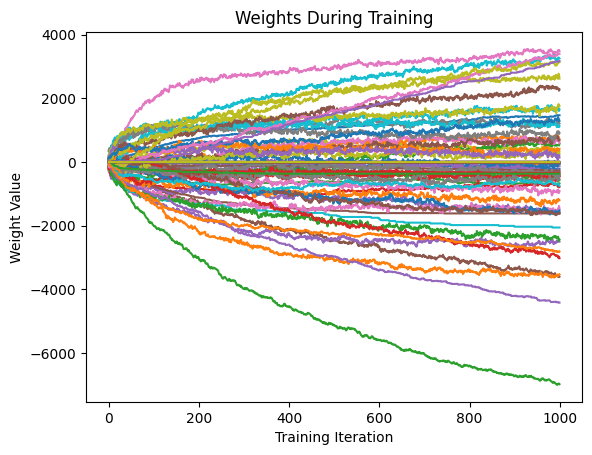

In [ ]:
plot_weights(weights_array)

In [ ]:
print('ACCURCY ON TEST DATA')
print('--------------------')
predictions = test_accuracy(tst, weights, 8)

ACCURCY ON TEST DATA
--------------------
Accuracy: 0.91


The code cell below visually displays four samples along with the label and prediction that the single layer perceptron made. A positive prediction means that the model predicted the sample as a and written 8 digit, while a negative means that the sample was a digit other than 8.



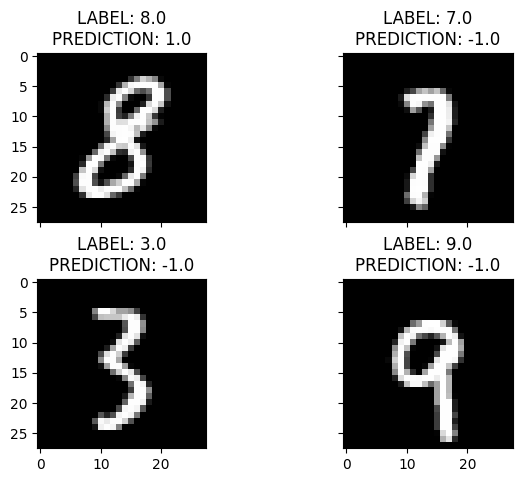

In [ ]:
#Create subplots
fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=2)
for ax in axs.flat:
    ax.label_outer()

#Display subplots
axs[0,0].set_title('LABEL: ' + str(tstlabels[110][0]) + '\nPREDICTION: ' + str(math.copysign(1, predictions[110])))
axs[0,0].imshow(x[:, :, 110].T, cmap='gray')
axs[0,1].set_title('LABEL: ' + str(tstlabels[111][0]) + '\nPREDICTION: ' + str(math.copysign(1, predictions[111])))
axs[0,1].imshow(x[:, :, 111].T, cmap='gray')
axs[1,0].set_title('LABEL: ' + str(tstlabels[112][0]) + '\nPREDICTION: ' + str(math.copysign(1, predictions[112])))
axs[1,0].imshow(x[:, :, 112].T, cmap='gray')
axs[1,1].set_title('LABEL: ' + str(tstlabels[113][0]) + '\nPREDICTION: ' + str(math.copysign(1, predictions[113])))
axs[1,1].imshow(x[:, :, 113].T, cmap='gray')

**How is the performance of the system?**

The system performed relatively well with around a 91 percent test accuracy. However, it did perform worse classifying digits as 8 or not than when it was classifying digits as 0 or not. This may be because 8 is a more complicated digit which has features like many other digits such as parts of 3, 9, and 6. On the other hand, 0 is a more unique digit with a simple structure that is easier to classify even with handwritten noise/variations. The increased difficulty of classifying digit 8 is also shown in the weights graph, which fails to converge to the point where all training samples are correct and no weight changes are made even after 1000 training iterations.




###Binary Classifer for Handwritten 1

The code cells below train the SLP architecture to classify digits as 1 or not. The model is run for 200 iterations (each iteration is a full cycle of all 5,000 data points), with the accuracy at each iteration being displayed. The weight trajectory graph is also shown, followed by the overall accuracy on the test data.




In [ ]:
trianing_iterations = 200
alpha = 0.1
weights, weights_array = init_weights()
#Call main SLP algorithm
weights, weights_array = SLP(trianing_iterations, alpha, tr, trlabels, weights, 1)

Accuracy at iteration:  0 :  0.9746
Accuracy at iteration:  1 :  0.983
Accuracy at iteration:  2 :  0.9854
Accuracy at iteration:  3 :  0.985
Accuracy at iteration:  4 :  0.9864
Accuracy at iteration:  5 :  0.988
Accuracy at iteration:  6 :  0.988
Accuracy at iteration:  7 :  0.9878
Accuracy at iteration:  8 :  0.9898
Accuracy at iteration:  9 :  0.9896
Accuracy at iteration:  10 :  0.9918
Accuracy at iteration:  11 :  0.9906
Accuracy at iteration:  12 :  0.9906
Accuracy at iteration:  13 :  0.9926
Accuracy at iteration:  14 :  0.9926
Accuracy at iteration:  15 :  0.9918
Accuracy at iteration:  16 :  0.9928
Accuracy at iteration:  17 :  0.9934
Accuracy at iteration:  18 :  0.994
Accuracy at iteration:  19 :  0.9934
Accuracy at iteration:  20 :  0.9942
Accuracy at iteration:  21 :  0.9944
Accuracy at iteration:  22 :  0.9952
Accuracy at iteration:  23 :  0.9962
Accuracy at iteration:  24 :  0.9946
Accuracy at iteration:  25 :  0.9942
Accuracy at iteration:  26 :  0.995
Accuracy at itera

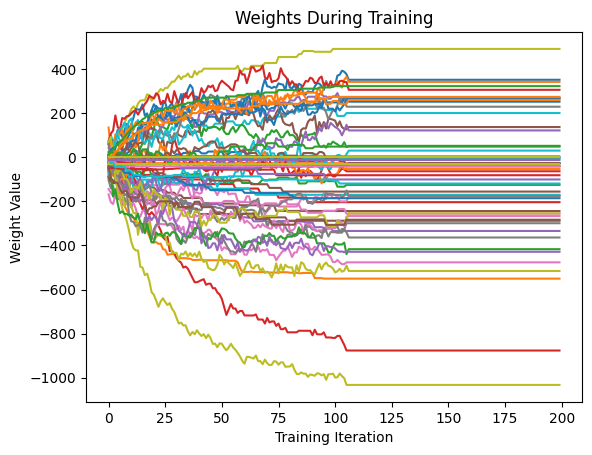

In [ ]:
plot_weights(weights_array)

In [ ]:
print('ACCURCY ON TEST DATA')
print('--------------------')
predictions = test_accuracy(tst, weights, 1)

ACCURCY ON TEST DATA
--------------------
Accuracy: 0.984


The code cell below visually displays four samples along with the label and prediction that the single layer perceptron made. A positive prediction means that the model predicted the sample as a and written 1 digit, while a negative means that the sample was a digit other than 1.



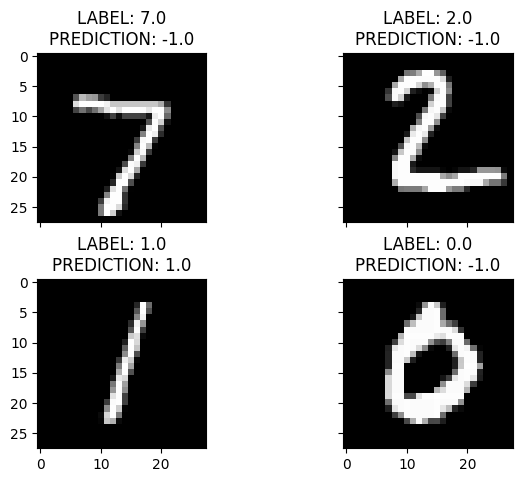

In [ ]:
 #Create subplots
fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=2)
for ax in axs.flat:
    ax.label_outer()

#Display subplots
axs[0,0].set_title('LABEL: ' + str(tstlabels[0][0]) + '\nPREDICTION: ' + str(math.copysign(1, predictions[0])))
axs[0,0].imshow(x[:, :, 0].T, cmap='gray')
axs[0,1].set_title('LABEL: ' + str(tstlabels[1][0]) + '\nPREDICTION: ' + str(math.copysign(1, predictions[1])))
axs[0,1].imshow(x[:, :, 1].T, cmap='gray')
axs[1,0].set_title('LABEL: ' + str(tstlabels[2][0]) + '\nPREDICTION: ' + str(math.copysign(1, predictions[2])))
axs[1,0].imshow(x[:, :, 2].T, cmap='gray')
axs[1,1].set_title('LABEL: ' + str(tstlabels[3][0]) + '\nPREDICTION: ' + str(math.copysign(1, predictions[3])))
axs[1,1].imshow(x[:, :, 3].T, cmap='gray')

**How is the performance of the system?**

The system performed well and achieved a 98.4 percent test accuracy. Additionally, the weights graph converged relatively quickly, unlike the weights graph for digit 8. The performance of this system when classifying the digit 1 is very similar to the system when classifying the digit 0, both in weights graph structure and test accuracy. This is because both 1 and 0 are very simple in structure and do not resemble other digits as closely as 8. Thus, the weights were able to converge to a configuration that separated the 1 samples from the other digits relatively quickly (iteration wise) and effectively.



###Binary Classifer for Handwritten 2

The code cells below train the SLP architecture to classify digits as 2 or not. The model is run for 1000 iterations (each iteration is a full cycle of all 5,000 data points), with the accuracy at each iteration being displayed. The weight trajectory graph is also shown, followed by the overall accuracy on the test data.



In [ ]:
trianing_iterations = 1000
alpha = 0.1
weights, weights_array = init_weights()
#Call main SLP algorithm
weights, weights_array = SLP(trianing_iterations, alpha, tr, trlabels, weights, 2)

Accuracy at iteration:  0 :  0.9474
Accuracy at iteration:  1 :  0.9568
Accuracy at iteration:  2 :  0.9588
Accuracy at iteration:  3 :  0.9636
Accuracy at iteration:  4 :  0.9654
Accuracy at iteration:  5 :  0.9668
Accuracy at iteration:  6 :  0.967
Accuracy at iteration:  7 :  0.9708
Accuracy at iteration:  8 :  0.9692
Accuracy at iteration:  9 :  0.9652
Accuracy at iteration:  10 :  0.9714
Accuracy at iteration:  11 :  0.9728
Accuracy at iteration:  12 :  0.9694
Accuracy at iteration:  13 :  0.9708
Accuracy at iteration:  14 :  0.973
Accuracy at iteration:  15 :  0.9698
Accuracy at iteration:  16 :  0.9732
Accuracy at iteration:  17 :  0.9718
Accuracy at iteration:  18 :  0.9716
Accuracy at iteration:  19 :  0.9732
Accuracy at iteration:  20 :  0.9714
Accuracy at iteration:  21 :  0.9728
Accuracy at iteration:  22 :  0.9764
Accuracy at iteration:  23 :  0.9748
Accuracy at iteration:  24 :  0.9786
Accuracy at iteration:  25 :  0.9736
Accuracy at iteration:  26 :  0.9758
Accuracy at i

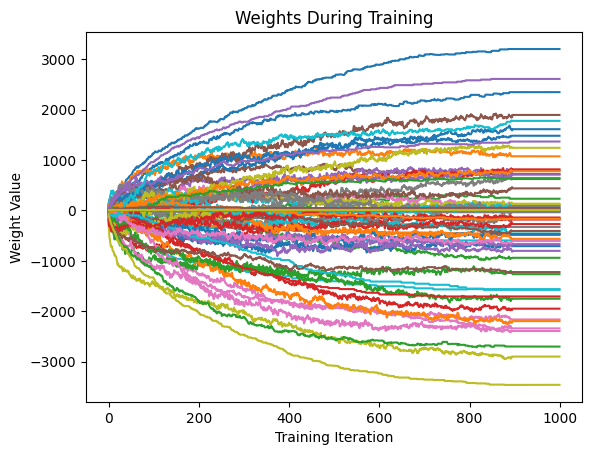

In [ ]:
plot_weights(weights_array)

In [ ]:
print('ACCURCY ON TEST DATA')
print('--------------------')
predictions = test_accuracy(tst, weights, 2)

ACCURCY ON TEST DATA
--------------------
Accuracy: 0.942


The code cell below visually displays four samples along with the label and prediction that the single layer perceptron made. A positive prediction means that the model predicted the sample as a and written 2 digit, while a negative means that the sample was a digit other than 2.



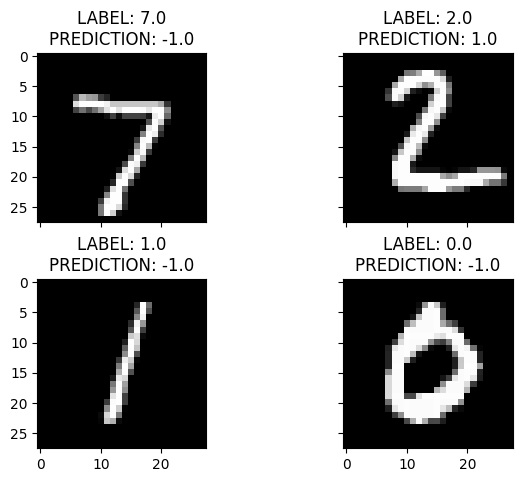

In [ ]:
#Create subplots
fig, axs = plt.subplots(2, 2)
fig.tight_layout(pad=2)
for ax in axs.flat:
    ax.label_outer()

#Display subplots
axs[0,0].set_title('LABEL: ' + str(tstlabels[0][0]) + '\nPREDICTION: ' + str(math.copysign(1, predictions[0])))
axs[0,0].imshow(x[:, :, 0].T, cmap='gray')
axs[0,1].set_title('LABEL: ' + str(tstlabels[1][0]) + '\nPREDICTION: ' + str(math.copysign(1, predictions[1])))
axs[0,1].imshow(x[:, :, 1].T, cmap='gray')
axs[1,0].set_title('LABEL: ' + str(tstlabels[2][0]) + '\nPREDICTION: ' + str(math.copysign(1, predictions[2])))
axs[1,0].imshow(x[:, :, 2].T, cmap='gray')
axs[1,1].set_title('LABEL: ' + str(tstlabels[3][0]) + '\nPREDICTION: ' + str(math.copysign(1, predictions[3])))
axs[1,1].imshow(x[:, :, 3].T, cmap='gray')

**How is the performance of the system?**

The system performed with a relatively successful test accuracy of 94 percent when classifying the digit 2. Additionally, the weights graph converged after 1000 iterations. This means that the system performed better than when classifying the digit 8, but worse than classifying the digit 0 or 1. This is most likely because 2 has a more complex structure than 0 or 1 and resembles digits like 3 closely in structure, but is not as complex and similar to other digits in structure as 8.



##Part 2 - Two Layer Perceptron

The second part of this assignment focuses on creating a multi-layer perceptron to classify all handwritten digits (0-9). The same dataset from part 1 is used, although a lower test accuracy is achieved due to the higher complexity of having to separate 10 classes instead of just 2. During the training process the error from each iteration is displayed to track the training progress. Additionally, an error curve is shown after model training. Finally, 9 samples from the test dataset are visually displayed along with their labels and the prediction from the model for model success analysis.


---



The code cells below define the logistic node function and initialize the weights randomly for the input to 28 hidden layers and for the 28 hidden layers to 10 output layers.


In [ ]:
#logisitc funciton used for layers
def node_function(lmbda):
  value = []
  for i in range(len(lmbda)):
    value.append(1/(1+ np.exp(-lmbda[i])))
  return(value)

In [ ]:
#Randomly initialize weights
weightsL1 = np.zeros((784, 25))
for i in range(784):
  tempweights = np.random.uniform(-1, 1, 25)
  weightsL1[i] = tempweights

weightsL2 = np.zeros((25, 10))
for i in range(25):
  tempweights = np.random.uniform(-1, 1, 10)
  weightsL2[i] = tempweights

The code cell below is the main back propagation training algorithm which iterates through all of the training data 200 times. I set alpha to 0.005 after some experimentation as it resulted in the best error curve and highest test accuracy that I found.

In [ ]:
loss_curve = []
for j in range(200):
  for i in range(len(tr[0])):
    #Forward pass
    temp = np.zeros((784,1))
    temp[:,0] = tr[:,i]
    lambda_L1 = np.dot(np.transpose(temp), weightsL1)
    value_L1 = node_function(lambda_L1[0])
    lambda_L2 = np.dot(value_L1, weightsL2)
    value_L2 = node_function(lambda_L2)

    #Calcaulate errors
    true_value = np.zeros(10)
    true_value[int(trlabels[i][0])] = 1
    errors = true_value - value_L2

    #Backward pass
    #Calculate deltas
    tempout = []
    for i in range(10):
      tempout.append(1-value_L2[i])
    delta_output = errors * value_L2 * (tempout)

    tempout2 = []
    for i in range(25):
      tempout2.append(1-value_L1[i])
    delta_hidden = np.dot(delta_output, np.transpose(weightsL2)) * value_L1 * tempout2

    #weight updates
    alpha = 0.005

    delta_temp = np.ones((1,25))
    delta_temp[0,:] = delta_hidden
    weightsL1 = weightsL1 - (alpha * np.dot(-temp, delta_temp))

    delta_temp2 = np.ones((1,10))
    delta_temp2[0,:] = delta_output
    value_temp = np.ones((25,1))
    value_temp[:,0] = value_L1
    weightsL2 = weightsL2 - (alpha * np.dot(-value_temp, delta_temp2))

  #Print loss at current iteration
  print('Error at iteration ', j, ': ', np.sum(errors**2))
  loss_curve.append(np.sum(errors**2))

<ipython-input-46-1d54febb0da1>:5: RuntimeWarning: overflow encountered in exp
  value.append(1/(1+ np.exp(-lmbda[i])))


Error at iteration  0 :  0.6562325112342445
Error at iteration  1 :  0.7682076479697001
Error at iteration  2 :  0.6209587899236384
Error at iteration  3 :  1.019614259692965
Error at iteration  4 :  0.7192137807455707
Error at iteration  5 :  0.48058601493040937
Error at iteration  6 :  0.47173204744696096
Error at iteration  7 :  0.8142989759733408
Error at iteration  8 :  0.6054454119978738
Error at iteration  9 :  0.3747566612451686
Error at iteration  10 :  0.34088311384841524
Error at iteration  11 :  0.3736497742824781
Error at iteration  12 :  0.32006305517496425
Error at iteration  13 :  0.3779625648524157
Error at iteration  14 :  0.34851137386915604
Error at iteration  15 :  0.5478993646460423
Error at iteration  16 :  0.4682313828697594
Error at iteration  17 :  0.47088654784322836
Error at iteration  18 :  0.44362803776327336
Error at iteration  19 :  0.2530732664230015
Error at iteration  20 :  0.19392928595896924
Error at iteration  21 :  0.2993443890326129
Error at iter

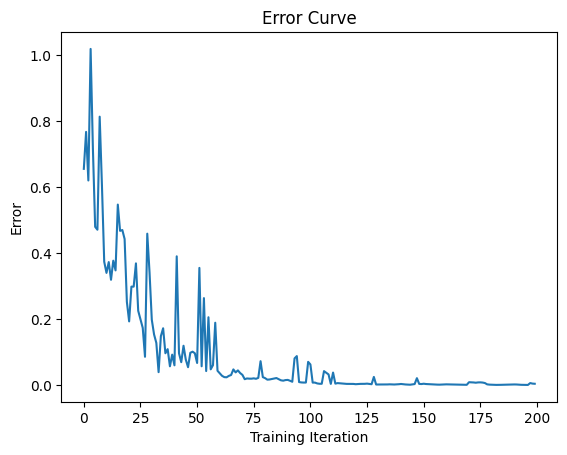

In [ ]:
#Plot loss curve
plt.plot(loss_curve)
plt.xlabel("Training Iteration")
plt.ylabel("Error")
plt.title("Error Curve")
plt.show()

In [ ]:
#Make predictions using trained weights on test set and report accuracy
number_correct = 0
number_incorrect = 0
predictions = []

for i in range(1000):
  temp = np.zeros((784,1))
  temp[:,0] = tst[:,i]
  lambda_L1 = np.dot(np.transpose(temp), weightsL1)
  value_L1 = node_function(lambda_L1[0])
  lambda_L2 = np.dot(value_L1, weightsL2)
  value_L2 = node_function(lambda_L2)

  index_max = np.argmax(value_L2)
  predictions.append(index_max)
  if index_max == tstlabels[i][0]:
    number_correct = number_correct + 1
  else:
    number_incorrect = number_incorrect + 1
print('ACCURCY ON TEST DATA')
print('--------------------')
print('Accuracy:', number_correct/1000)

ACCURCY ON TEST DATA
--------------------
Accuracy: 0.794


<ipython-input-46-1d54febb0da1>:5: RuntimeWarning: overflow encountered in exp
  value.append(1/(1+ np.exp(-lmbda[i])))


The code cell below visually displays 9 samples along with the label and prediction that the multi-layer perceptron made.

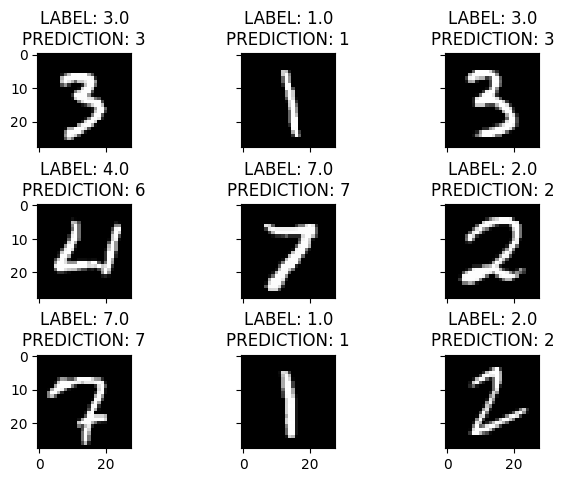

In [ ]:
#Create subplots
fig, axs = plt.subplots(3, 3)
fig.tight_layout(pad=2)
for ax in axs.flat:
    ax.label_outer()

#Display subplots
for i, ax in enumerate(fig.axes):
  ax.set_title('LABEL: ' + str(tstlabels[i+30][0]) + '\nPREDICTION: ' + str(round(predictions[i+30])))
  ax.imshow(x[:, :, i+30].T, cmap='gray')

**How is the performance of the system?**

The system performed with a relatively successful test accuracy of around 80 percent. Although this is far lower than the accuracies seen in the binary classification problems in part 1, this makes sense due to the increased complexity of classifying 10 different classes (0-9). The error curve shows a general downward trend and eventual convergence, showing that the model successfully trained. The error curve did fluctuate during its downward trajectory, but this is because the model trained the weights based on each individual sample and not in batches (which would help smooth out the curve). Although the model only achieved around 80% accuracy, many of the mistakes that it makes are due to poorly written digits, as shown by the 4 in the code cell above which could be mistaken (even by a human) as a different digit. Overall, a baseline of random guessing would achieve an accuracy of 10%, which this model significantly beats making it successful.